### **REFÊNCIAS**
> Series temporais com Prophet do Facebook: 
- LINK: https://medium.com/@gabriel.stankevix/series-temporais-com-prophet-do-facebook-677de42fd726

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np  
from scipy.stats import norm

# **Dados sobre a velocidade do vento (PETROLINA)**

> Pré-processamento

> Visualização dos dados

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
# df = pd.read_csv('/content/drive/MyDrive/Projeto/PLD, ARIMA e predição de series temporais/_modelagem/pre-processamento e visualização de dados/dataset_petrolina.csv')
df = pd.read_csv('/content/dataset_petrolina.csv')
df

,Data,Velocidade,Temperatura,Umidade,Pressão,Direção
0,1/1/2004,"6,50","26,46","62,32","969,02","147,89"
1,1/2/2004,"6,62","26,71","63,68","969,30","160,62"
2,1/3/2004,"8,47","27,23","62,08","969,26","127,97"
3,1/4/2004,"6,50","27,25","57,70","969,06","120,62"
4,1/5/2004,"8,11","27,57","60,93","968,40","110,70"
...,...,...,...,...,...,...
4895,5/27/2017,"7,18","25,51","62,97","969,96","131,42"
4896,5/28/2017,"7,35","25,61","62,25","969,65","131,32"
4897,5/29/2017,"7,02","26,18","58,00","969,84","138,47"
4898,5/30/2017,"8,62","26,27","59,18","970,60","142,20"


In [7]:
# Convertendo a coluna "Data" em datetime
df.Data = pd.to_datetime(df.Data)

# Tranformando a coluna "Data" em index
df.set_index('Data', inplace=True)

# Convertendo os formatos numericos de "," para "."
df['Velocidade'] = df['Velocidade'].apply(lambda x: str(x).replace(",","."))
df['Temperatura'] = df['Temperatura'].apply(lambda x: str(x).replace(",","."))
df['Umidade'] = df['Umidade'].apply(lambda x: str(x).replace(",","."))
df['Pressão'] = df['Pressão'].apply(lambda x: str(x).replace(",","."))
df['Direção'] = df['Direção'].apply(lambda x: str(x).replace(",","."))

# Convertendo tudo pra float
df['Velocidade'] = df['Velocidade'].astype(float)
df['Temperatura'] = df['Temperatura'].astype(float)
df['Umidade'] = df['Umidade'].astype(float)
df['Pressão'] = df['Pressão'].astype(float)
df['Direção'] = df['Direção'].astype(float)
df.dtypes

# exibindo os tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4900 entries, 2004-01-01 to 2017-05-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Velocidade   4900 non-null   float64
 1   Temperatura  4900 non-null   float64
 2   Umidade      4900 non-null   float64
 3   Pressão      4900 non-null   float64
 4   Direção      4900 non-null   float64
dtypes: float64(5)
memory usage: 229.7 KB


In [8]:
df.head()

,Velocidade,Temperatura,Umidade,Pressão,Direção
Data,,,,,
2004-01-01,6.50,26.46,62.32,969.02,147.89
2004-01-02,6.62,26.71,63.68,969.30,160.62
2004-01-03,8.47,27.23,62.08,969.26,127.97
2004-01-04,6.50,27.25,57.70,969.06,120.62
2004-01-05,8.11,27.57,60.93,968.40,110.70


# **Análise exploratória dos dados**

> Visualização dos dados

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


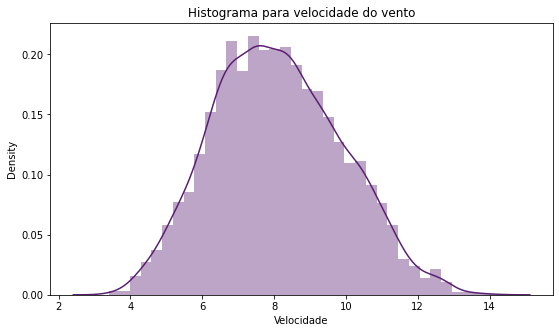

In [14]:
sns.set_color_codes(palette='dark')

f, ax = plt.subplots(figsize=(9, 5))
sns.distplot(df['Velocidade'], color="m", axlabel='Velocidade')
ax.set(title="Histograma para velocidade do vento")
plt.show()

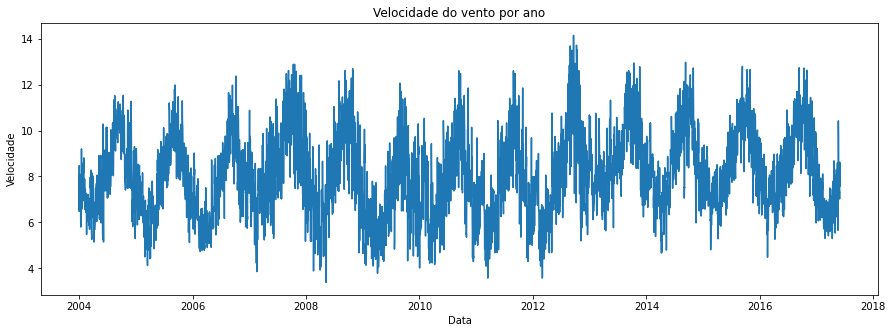

In [10]:
f, axes = plt.subplots(1, figsize=(15,5))

sns.lineplot(x="Data", y="Velocidade",data=df)

plt.title("Velocidade do vento por ano")

plt.show()

**OBS: Corrigir a visualização**

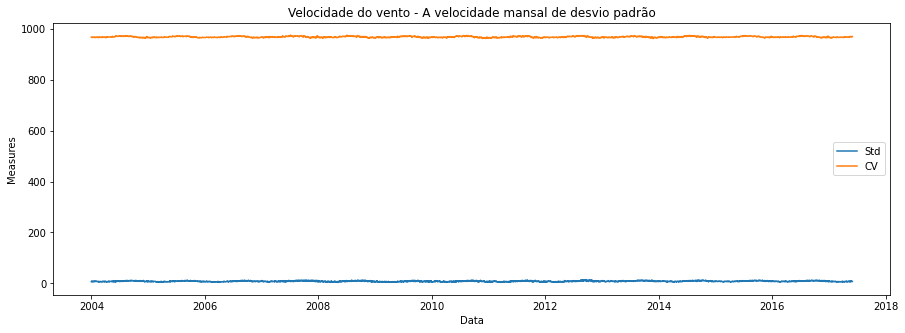

In [11]:
f, axes = plt.subplots(1, figsize=(15,5))

sns.lineplot(x="Data", y="Velocidade",label ='Std',data=df)
sns.lineplot(x="Data", y="Pressão",label ='CV',data=df)

plt.ylabel('Measures')

plt.title("Velocidade do vento - A velocidade mansal de desvio padrão")

plt.show()

> Avaliando a estacionariedade da serie temporal:
- Teste de estacionariedade - Teste de Dickey Fuller

nova forma de testar

In [17]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset, log_test = False):
    ds = dataset
    
    if log_test:
        ds = np.log(ds)
        ds.dropna(inplace=True)
    
    alpha = 0.05
    
    result = tsa.adfuller(ds)
    print('Augmented Dickey-Fuller Test')
    print('test statistic: %.10f' % result[0])
    print('p-value: %.10f' % result[1])
    print('critical values')
    
    for key, value in result[4].items():
        print('\t%s: %.10f' % (key, value))
        
    if result[1] < alpha:  #valor de alpha é 0.05 ou 5 %
        print("Rejeitamos a Hipotese Nula")
    else:
        print("Aceitamos a Hipotese Nula")

In [13]:
adf_test(df['Velocidade'], True)

NameError: ignored

teste antigo

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(365).mean() #media movel
    rolstd = timeseries.rolling(365).std() #desvio movel

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Média móvel & desvio padrão')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Resultados do teste de Dickey-Fuller')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística do teste','p-value','O critério de informação maximizado ','Número de observações usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    print(dfoutput)

In [19]:
def ehEstacionaria(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística do teste','p-value','O critério de informação maximizado ','Número de observações usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    
    if(dfoutput['Estatística do teste'] < dfoutput['Valor crítico (5%)'] and dfoutput['p-value'] < 0.05):
        print('É estacionária.')
    else:
        print('Não é estacionária.')

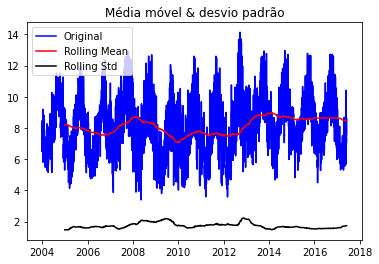

Resultados do teste de Dickey-Fuller
Estatística do teste                      -4.174321
p-value                                    0.000728
O critério de informação maximizado       32.000000
Número de observações usadas            4867.000000
Valor crítico (1%)                        -3.431694
Valor crítico (5%)                        -2.862134
Valor crítico (10%)                       -2.567086
dtype: float64


In [20]:
test_stationarity(df.Velocidade)

In [21]:
ehEstacionaria(df.Velocidade)

É estacionária.


- Tornando uma série estacionária

In [ ]:
dfdiff = df.Velocidade.diff()
dfdiff = dfdiff.dropna()
plt.title("Velocidade do vento")
dfdiff.plot()
plt.show()

In [ ]:
# Novo teste de estacionariedade
test_stationarity(dfdiff)

In [ ]:
# Novo teste estatístico
ehEstacionaria(dfdiff)

In [ ]:
# Verificando a variável terget (VELOCIDADE)
df['Velocidade'].value_counts()
sns.countplot(df['Velocidade'])

In [ ]:
# Explorando as correlações com o Target (VELOCIDADE)
df.corr()['Velocidade'].sort_values(ascending=False)

In [ ]:
# Estatisticas descritivas das variáveis
df.describe()

# **Pré-processamento dos dados**


> Normalização


In [ ]:
# Normalização, padronização
def normalizar(data_set):
  norms=[]
  minimo = np.min(data_set)
  maximo = np.max(data_set)
  
  for data in data_set:
    x = (data - minimo)/(maximo - minimo)
    norms.append(x)


  return norms

In [ ]:
df.Velocidade=normalizar(df.Velocidade)
df.Temperatura=normalizar(df.Temperatura)
df.Umidade=normalizar(df.Umidade)
df.Pressão=normalizar(df.Pressão)
df.Direção=normalizar(df.Direção)
df

> Identificação de valores ausentes

In [ ]:
# Checa se existe dados faltantes e lista eles
df.isna().sum()

In [ ]:
# mostra os registros nulos (SE HOUVER)
df.isnull().sum();

> Detecção de outliers
- Utilizando Z-Score


In [ ]:
# Identificação e remoção de 
outliers=[]

def find_outliers(df):
    corte_dp=3
    media = np.mean(df)
    dp = np.std(df)

    for dado in df:

      z_score = (dado - media)/dp
      if np.abs(z_score) == corte_dp:
        outliers.append(dado)

    return outliers

In [ ]:
outliers = find_outliers(df['Velocidade'])
outliers

- Detecção de outliers com KNN

In [ ]:
# Instalando a biblioteca
!pip install pyod

In [ ]:
from pyod.models.knn import KNN

In [ ]:
detector = KNN()
detector.fit(df.iloc[:,0:5])

In [ ]:
previsoes = detector.labels_
previsoes

In [ ]:
np.unique(previsoes, return_counts=True)

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

In [ ]:
outliers = []
for i in range(len(previsoes)):
  # print(i)
  if previsoes[i] == 1:
    outliers.append(i)

In [ ]:
print(outliers)

In [ ]:
lista_outliers = df.iloc[outliers,:]
lista_outliers

- 3ª modo - Identificação e remoção

In [ ]:
# descriptive stats
df.describe()

> Separação de dados TREINO e TESTE

In [ ]:
# Separando os dados para treinamento e teste da máquina preditiva
x = df.drop(['Velocidade'], axis=1)
y = df['Velocidade']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=7)

# **Visualização dos dados**

> Alternar as variáveis para testar a visualização dos dados


*   Data e Velocidade
*   Velocidade e Direção
*   Pressçao e Umidade
*   Temperatura, velocidade e data

In [ ]:
# define a function called "plot_boxplot"
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

In [ ]:
plot_boxplot(df, "Velocidade")

In [ ]:
plot_boxplot(df, "Direção")

In [ ]:
df.plot(figsize=(15, 6))
# plt.xticks(rotation=45)
# plt.xlabel('Data')
# plt.xlabel('Temperatura')
# plt.tight_layout()

# filtro = (df.index.year >= 2004) & (df.index.year <= 2007)
# df[filtro].plot()

In [ ]:
df.Velocidade.plot()

In [ ]:
dfdiff.plot()

In [ ]:
df.Direção.plot()

In [ ]:
# Aprender (Médias móveis)
df.Velocidade.rolling(365).mean().plot()

In [ ]:
filtro = (df.index.year >= 2004) & (df.index.year <= 2006)
df[filtro].Velocidade.rolling(365).mean().plot()

In [ ]:
# Histograma da variável "Data"
plt.hist(x = df['Velocidade']);

In [ ]:
sns.scatterplot(x=0, y=1, hue='Velocidade', data=df)
plt.title('Teste')